# Aerosol Size Distribution Analysis

In [1]:
library(ggplot2)
theme_set(theme_gray(base_size = 16)) #set graphic theme for plotting

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


## Define constants: Aerosol Mode and Species Properties

In [2]:
# Define names of modes
mode_names <- c("accu", "aitk", "coarse", "porg")

# Assign sigma (fixed width of lognormal bin) for each mode. [-]
# (see Liu et al., 2016; physprops files)
sigma_g <- c(1.8, 1.6, 1.8, 1.6)

# Density of aerosol components as assigned in the model [kg m^-3]
density_mom <- 1601.
density_ncl <- 1900.
density_pom <- 1000.
density_soa <- 1000.
density_so4 <- 1770.
density_dst <- 2600.
density_bc  <- 1700.

# Hygroscopicity of aerosol components as assigned in the model [-]
kappa_mom <- 0.1
kappa_ncl <- 1.16
kappa_pom <- 1.0e-10
kappa_soa <- 0.14
kappa_so4 <- 0.507
kappa_dst <- 0.068
kappa_bc  <- 1.0e-10

## Point-wise size distribution analysis (surface level)
### Read in csv generated by python netcdf_to_csv script/notebook
Given the lat-lon coordinates used to create it

In [5]:
lat <- 44.67
lon <- -79.5
getPointCsv <- function(lat,lon,dirname='data'){
        filename <- paste0('surface_chem_E3SM_v0_MOA_',toString(lat),'_',toString(lon),'.csv') #default generated by netcdf_to_csv notebook
        df <- read.csv(file.path(dirname,filename))
        return(df)
}
df <- getPointCsv(lat,lon)
head(df)

X,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
mom_a1,2.864857e-12,3.000539e-12,4.610625e-12,5.180943e-12,5.837921e-12,6.586449e-12,9.755179e-12,8.318360e-12,7.177359e-12,1.446591e-11,1.051574e-11,3.637329e-12
mom_a2,4.921530e-15,6.964873e-15,1.382461e-14,2.017354e-14,1.703614e-14,6.731860e-15,6.004430e-15,5.581159e-15,8.828692e-15,2.679486e-14,2.404911e-14,8.694496e-15
mom_a3,6.714769e-13,8.246885e-13,1.280824e-12,1.506442e-12,1.424965e-12,1.224565e-12,1.736447e-12,1.601499e-12,1.852435e-12,3.603426e-12,2.754510e-12,7.459794e-13
mom_a4,5.574821e-17,4.120913e-17,4.924851e-17,1.027428e-16,7.511132e-17,2.275181e-17,2.177335e-17,6.139768e-17,1.246112e-16,5.809989e-16,6.135655e-16,1.485631e-16
mom_c1,1.825760e-13,9.456131e-14,4.446151e-14,5.960419e-14,1.401730e-13,1.473928e-13,1.457103e-13,1.560895e-13,1.094724e-13,8.664151e-14,1.993439e-13,8.091145e-14
mom_c2,4.139292e-17,2.889305e-17,1.550330e-17,1.824367e-17,1.025327e-17,3.740301e-18,1.446693e-18,7.895242e-19,2.095792e-18,1.757110e-17,4.628276e-17,2.130920e-17


### Transform df to take advantage of data.frames format capability
(Column-wise variable storage; months now stored in row names)

In [6]:
dat <- as.data.frame(t(df[,-1]))
colnames(dat) <- df$X
dat

,mom_a1,mom_a2,mom_a3,mom_a4,mom_c1,mom_c2,mom_c3,mom_c4,ncl_a1,ncl_a2,...,wat_a2,wat_a3,wat_a4,Q,PS,T,dgnd_a01,dgnd_a02,dgnd_a03,dgnd_a04
JAN,2.864857e-12,4.921530e-15,6.714769e-13,5.574821e-17,1.825760e-13,4.139292e-17,5.134086e-14,6.465191e-33,2.996507e-11,5.559502e-14,...,1.245578e-10,1.805995e-09,1.851258e-17,0.001578068,98644.83,260.1971,1.139768e-07,3.936091e-08,1.793869e-06,9.719718e-08
FEB,3.000539e-12,6.964873e-15,8.246885e-13,4.120913e-17,9.456131e-14,2.889305e-17,3.143726e-14,7.398968e-35,3.694728e-11,9.449359e-14,...,1.491745e-10,1.732756e-09,9.383706e-18,0.002001337,98606.48,265.0777,1.103736e-07,3.945897e-08,1.796967e-06,9.710481e-08
MAR,4.610625e-12,1.382461e-14,1.280824e-12,4.924851e-17,4.446151e-14,1.550330e-17,2.642783e-14,1.667286e-26,4.362364e-11,1.405359e-13,...,1.366346e-10,1.424226e-09,6.993418e-18,0.002834747,98496.91,272.9123,1.104988e-07,3.740892e-08,1.880328e-06,9.712715e-08
APR,5.180943e-12,2.017354e-14,1.506442e-12,1.027428e-16,5.960419e-14,1.824367e-17,3.349846e-14,1.717063e-24,3.111868e-11,1.160098e-13,...,1.571475e-10,1.193257e-09,6.079678e-18,0.004572301,98367.59,282.4865,1.095845e-07,3.478300e-08,2.067308e-06,9.719313e-08
MAY,5.837921e-12,1.703614e-14,1.424965e-12,7.511132e-17,1.401730e-13,1.025327e-17,3.830215e-14,5.824158e-24,2.721450e-11,3.752348e-14,...,1.560018e-10,1.379315e-09,3.883709e-18,0.007053090,98406.70,288.7524,1.162209e-07,3.632912e-08,2.080072e-06,9.704851e-08
JUN,6.586449e-12,6.731860e-15,1.224565e-12,2.275181e-17,1.473928e-13,3.740301e-18,2.996470e-14,6.493808e-29,3.524215e-11,9.587291e-15,...,1.013876e-10,1.220880e-09,6.721285e-19,0.010178135,98409.10,294.8955,1.319365e-07,3.845108e-08,2.039732e-06,9.690945e-08
JUL,9.755179e-12,6.004430e-15,1.736447e-12,2.177335e-17,1.457103e-13,1.446693e-18,3.268645e-14,1.477771e-24,3.866213e-11,6.078345e-15,...,8.372639e-11,1.339498e-09,1.886160e-18,0.011901045,98362.12,296.8582,1.436251e-07,3.958876e-08,2.092699e-06,9.684940e-08
AUG,8.318360e-12,5.581159e-15,1.601499e-12,6.139768e-17,1.560895e-13,7.895242e-19,3.444764e-14,1.767722e-24,4.380379e-11,5.478441e-15,...,5.918116e-11,1.267549e-09,4.626990e-18,0.011376936,98533.97,295.9900,1.495821e-07,4.041518e-08,2.069399e-06,9.688095e-08
SEP,7.177359e-12,8.828692e-15,1.852435e-12,1.246112e-16,1.094724e-13,2.095792e-18,3.962512e-14,3.638456e-24,3.630582e-11,1.229356e-14,...,6.685052e-11,1.420044e-09,5.622968e-18,0.008982590,98805.28,291.5058,1.420697e-07,4.043206e-08,2.131287e-06,9.697936e-08
OCT,1.446591e-11,2.679486e-14,3.603426e-12,5.809989e-16,8.664151e-14,1.757110e-17,4.305458e-14,3.430205e-28,5.267965e-11,5.484443e-14,...,7.497145e-11,1.923715e-09,8.694797e-17,0.005600663,98681.29,283.7733,1.241008e-07,3.954918e-08,2.039367e-06,9.725101e-08


### Calculate (moist) air density

In [7]:
# Better would be to use (level pressure difference) / gravity
dat$vapor.pressure <- dat$Q/(dat$Q + 0.622) * dat$PS
 
# Dry air density [kg/m3]
dat$dry.density <- dat$PS / (287.0531 * dat$T)
 
# Moist air density [kg/m3]
dat$moist.density <- (dat$PS - dat$vapor.pressure) / (287.0531 * dat$T) +
dat$vapor.pressure/(461.4964 * dat$T)

# see all variables now stored in dat data frame:
colnames(dat)

[1] "mom_a1"         "mom_a2"         "mom_a3"         "mom_a4"        
 [5] "mom_c1"         "mom_c2"         "mom_c3"         "mom_c4"        
 [9] "ncl_a1"         "ncl_a2"         "ncl_a3"         "ncl_c1"        
[13] "ncl_c2"         "ncl_c3"         "pom_a1"         "pom_a3"        
[17] "pom_a4"         "pom_c1"         "pom_c3"         "pom_c4"        
[21] "soa_a1"         "soa_a2"         "soa_a3"         "soa_c1"        
[25] "soa_c2"         "soa_c3"         "so4_a1"         "so4_a2"        
[29] "so4_a3"         "so4_c1"         "so4_c2"         "so4_c3"        
[33] "dst_a1"         "dst_a3"         "dst_c1"         "dst_c3"        
[37] "bc_a1"          "bc_a3"          "bc_a4"          "bc_c1"         
[41] "bc_c3"          "bc_c4"          "num_a1"         "num_a2"        
[45] "num_a3"         "num_a4"         "num_c1"         "num_c2"        
[49] "num_c3"         "num_c4"         "wat_a1"         "wat_a2"        
[53] "wat_a3"         "wat_a4"         "Q"              "PS"            
[57] "T"              "dgnd_a01"       "dgnd_a02"       "dgnd_a03"      
[61] "dgnd_a04"       "vapor.pressure" "dry.density"    "moist.density"

### Calculate total mass, volume of each mode

In [8]:
# Calculate total mass in each mode

# Interstitial aerosol mass mixing ratio [kg/kg]
mmr_a1 <- dat$mom_a1 + dat$ncl_a1 + dat$pom_a1 + dat$soa_a1 + dat$so4_a1 + dat$dst_a1 + dat$bc_a1
mmr_a2 <- dat$mom_a2 + dat$ncl_a2 + dat$soa_a2 + dat$so4_a2
mmr_a3 <- dat$mom_a3 + dat$ncl_a3 + dat$pom_a3 + dat$soa_a3 + dat$so4_a3 + dat$dst_a3 + dat$bc_a3
mmr_a4 <- dat$mom_a4 + dat$pom_a4 + dat$bc_a4
    
# Cloud-borne aerosol mass mixing ratio [kg/kg]
mmr_c1 <- dat$mom_c1 + dat$ncl_c1 + dat$pom_c1 + dat$soa_c1 + dat$so4_c1 + dat$dst_c1 + dat$bc_c1
mmr_c2 <- dat$mom_c2 + dat$ncl_c2 + dat$soa_c2 + dat$so4_c2
mmr_c3 <- dat$mom_c3 + dat$ncl_c3 + dat$pom_c3 + dat$soa_c3 + dat$so4_c3 + dat$dst_c3 + dat$bc_c3
mmr_c4 <- dat$mom_c4 + dat$pom_c4 + dat$bc_c4

In [9]:
# Calculate volume mixing ratio in each mode [m3/kg]
vol_per_kg_a1 <- (dat$mom_a1/density_mom + dat$ncl_a1/density_ncl + dat$pom_a1/density_pom +
                        dat$soa_a1/density_soa + dat$so4_a1/density_so4 + dat$dst_a1/density_dst +
                        dat$bc_a1/density_bc)
vol_per_kg_a2 <- (dat$mom_a2/density_mom + dat$ncl_a2/density_ncl +
                        dat$soa_a2/density_soa + dat$so4_a2/density_so4)
vol_per_kg_a3 <- (dat$mom_a3/density_mom + dat$ncl_a3/density_ncl + dat$pom_a3/density_pom +
                        dat$soa_a3/density_soa + dat$so4_a3/density_so4 + dat$dst_a3/density_dst + dat$bc_a3/density_bc)
vol_per_kg_a4 <- (dat$mom_a4/density_mom + dat$pom_a4/density_pom + dat$bc_a4/density_bc)
    
# Cloud-borne aerosol volume mixing ratio [m3/kg]
vol_per_kg_c1 <- (dat$mom_c1/density_mom + dat$ncl_c1/density_ncl + dat$pom_c1/density_pom +
                        dat$soa_c1/density_soa + dat$so4_c1/density_so4 + dat$dst_c1/density_dst + dat$bc_c1/density_bc)
vol_per_kg_c2 <- (dat$mom_c2/density_mom + dat$ncl_c2/density_ncl +
                        dat$soa_c2/density_soa + dat$so4_c2/density_so4)
vol_per_kg_c3 <- (dat$mom_c3/density_mom + dat$ncl_c3/density_ncl + dat$pom_c3/density_pom +
                        dat$soa_c3/density_soa + dat$so4_c3/density_so4 + dat$dst_c3/density_dst + dat$bc_c3/density_bc)
vol_per_kg_c4 <- (dat$mom_c4/density_mom + dat$pom_c4/density_pom + dat$bc_c4/density_bc)

### Convert from [kg/kg] to [ng/m3] 

In [10]:
# Interstitial
mass_a1 <- mmr_a1*1.e12*dat$moist.density
mass_a2 <- mmr_a2*1.e12*dat$moist.density
mass_a3 <- mmr_a3*1.e12*dat$moist.density
mass_a4 <- mmr_a4*1.e12*dat$moist.density

# Cloud-borne
mass_c1 <- mmr_c1*1.e12*dat$moist.density
mass_c2 <- mmr_c2*1.e12*dat$moist.density
mass_c3 <- mmr_c3*1.e12*dat$moist.density
mass_c4 <- mmr_c4*1.e12*dat$moist.density

# Convert from [m3/kg] to [m3/m3]
# Convert to (cm^3/mol_air)

# Use moist air density    
mol_air_per_m3 <- dat$moist.density
    
vol_a1 <- vol_per_kg_a1*dat$moist.density
vol_a2 <- vol_per_kg_a2*dat$moist.density
vol_a3 <- vol_per_kg_a3*dat$moist.density
vol_a4 <- vol_per_kg_a4*dat$moist.density

# Convert from [m3/kg] to [m3/m3]
# Convert to (cm^3/mol_air)

# Use moist air density
mol_air_per_m3 <- dat$moist.density

vol_a1 <- vol_per_kg_a1*dat$moist.density
vol_a2 <- vol_per_kg_a2*dat$moist.density
vol_a3 <- vol_per_kg_a3*dat$moist.density
vol_a4 <- vol_per_kg_a4*dat$moist.density

# Convert from [m3/kg] to [m3/m3]
# Convert to (cm^3/mol_air)
vol_c1 <- vol_per_kg_c1*dat$moist.density
vol_c2 <- vol_per_kg_c2*dat$moist.density
vol_c3 <- vol_per_kg_c3*dat$moist.density
vol_c4 <- vol_per_kg_c4*dat$moist.density

# Mode median diameter
# Compare subroutine modal_aero_calcsize_sub() in modal_aero_calcsize.F90
dgn_a1 <- dat$dgnd_a01
dgn_a2 <- dat$dgnd_a02
dgn_a3 <- dat$dgnd_a03
dgn_a4 <- dat$dgnd_a04

# Compute [dry] volume-to-number ratio [cm^3 m^-3]
v2n_a1 <- vol_a1 / dgn_a1
v2n_a2 <- vol_a2 / dgn_a2
v2n_a3 <- vol_a3 / dgn_a3
v2n_a4 <- vol_a4 / dgn_a4

### Create size distribution bins

In [11]:
makeBins <- function(){
    nbins <- 150    #number of bins for distribution 
    Dp_min <- 1.e-9 # lower bound of first bin (m), corresponds to 1nm
    Dp_max <- 1.e-5 # upper bound of last bin (m), corresponds to 10 micrometers
    dlogDp_max <- log10(Dp_max/Dp_min)
    dlogDp <- dlogDp_max/nbins
    factor_Dp <- 10.**dlogDp # factor used for calculating bins
    
    Dp_low <- array(0,c(nbins,1))  # lower bound of each bin 
    Dp_up <- array(0,c(nbins,1))   # upper bound of each bin
    Dp_mid <- array(0,c(nbins,1))  # midpoint of each bin
    for(i in 1:nbins){
        Dp_low[i] <- Dp_min*factor_Dp**(i-1) 
        Dp_up[i] <- Dp_min*factor_Dp**(i)
        Dp_mid[i] <- (Dp_low[i]+Dp_up[i])/2.
    }
    return(Dp_mid)
} 
Dp = makeBins()

### Calculate dNdlogDp for aerosol number distribution

From Seinfeld & Pandis (2006):

$$ N(D_p) = \frac{N_t}{(2\pi)^{1/2}ln\sigma_g} \int_0^{D_p}\frac{1}{D_p^*}exp[-\frac{(lnD_p^* - ln\overline{D}_{pg})^2}{2ln^2\sigma_g}]dD_p^* $$



In [12]:
calculate_dNdlogDp <- function(N_total, sigma_g, Dp, DpgN) {
  tmp <- -((log(Dp/DpgN))^2) / (2.0*(log(sigma_g))^2)
  dNdlogDp <- (N_total/(2.506628*log(sigma_g)) ) *exp(tmp)*
    log(10) # convert from dN/dlnDp to dN/dlogDp
}

### Calculate point chemistry data 

In [13]:
station.aerosols <- dat


# Initialize empty data frames for station data.
dNdlogDp <- data.frame(stringsAsFactors=FALSE)
station_OMF_dp <- data.frame(stringsAsFactors=FALSE)
station_chemistry_dp <- data.frame(stringsAsFactors=FALSE)

for (i in 1:dim(station.aerosols)[1]) {
    for (phase in c("a", "c")) {
        for (amode in 1:4) {
          # Get aerosol number and mode median diameter at each station;
          # compute number in each bin.  Units: [1/kg]*[kg/m^3]*[m^3/(1e6 cc)] = #/cc.

            assign(paste("bin_num_", phase, amode, sep=""),
                   calculate_dNdlogDp(
                       station.aerosols[[paste("num_", phase, amode, sep="")]][i]*
                       station.aerosols[["moist.density"]][i]*1.e-6,
                       sigma_g[amode], Dp,
                       station.aerosols[[paste("dgnd_a0", amode, sep="")]][i]
                   ))
            
            # Compute volume in each bin.
            assign(paste("bin_vol_", phase, amode, sep=""),
                   get(paste("bin_num_", phase, amode, sep="")) *
                   0.523599 * Dp^3 * 1.e18) # um^3/cc(air)
            
            # Compute volume fraction of marine organics, salt.
            for (species in c("mom", "ncl", "pom", "soa", "so4", "dst", "bc")) {
                assign(paste("bin_", species, "_vol_", phase, amode, sep=""),
                       # Calculate species volume fraction
                       (station.aerosols[[paste(species, "_", phase, amode, sep="")]][i] /
                        get(paste("density_", species, sep=""))) /
                       get(paste("vol_per_kg_", phase, amode, sep=""))[i] *
                       # Multiply by total modal volume projection into bin
                       get(paste("bin_vol_", phase, amode, sep=""))
                      )
            }
                  
            # compute volume-weighted kappa species contributions
            assign(paste("kappa_marine_", phase, amode, sep=""),
                   (kappa_mom * get(paste("bin_mom_vol_", phase, amode, sep="")) +
                    kappa_ncl * get(paste("bin_ncl_vol_", phase, amode, sep=""))) /
                   get(paste("bin_mom_vol_", phase, amode, sep="")) +
                   get(paste("bin_ncl_vol_", phase, amode, sep="")))                
        } #end mode loop 1
    }#end phase loop 1
    
    # Size-resolved aerosol chemistry
    for (species in c("mom", "ncl", "pom", "soa", "so4", "dst", "bc")) {
        assign(paste("bin_", species, "_vol", sep=""), 0)
        assign(paste("bin_", species, "_mass", sep=""), 0)
        assign(paste("bin_", species, "_num", sep=""), 0)
        for (phase in c("a", "c")) {
            for (amode in 1:4) {
                if (exists(paste("bin_", species, "_vol_", phase, amode , sep=""))) {
                    if (length(get(paste("bin_", species, "_vol_", phase, amode , sep=""))) > 0) {
                        ### Speciated volume distribution
                        #            print(paste("Assigning bin_", species, "_vol_", phase, amode , sep=""))
                        assign(paste("bin_", species, "_vol", sep=""),
                               get(paste("bin_", species, "_vol", sep="")) +
                               get(paste("bin_", species, "_vol_", phase, amode , sep="")) )
                    }
                    ### Speciated number distribution
                    if (any(names(station.aerosols) == paste(species, "_", phase, amode, sep=""))) {
                        assign(paste("bin_", species, "_num", sep=""),
                               get(paste("bin_", species, "_num", sep="")) +
                               get(paste("bin_num_", phase, amode , sep="")) *
                               station.aerosols[[paste(species, "_", phase, amode, sep="")]][i] /
                               get(paste("mmr_", phase, amode, sep=""))[i]
                              )
                    }
                }
            } # End loop amode 2
        } # End loop phase 2
    } # End loop species

  # Total number.
  bin_num <- 0
  bin_vol <- 0
  for (phase in c("a", "c")) {
    for (amode in 1:4) {
      bin_num <- bin_num + get(paste("bin_num_", phase, amode, sep=""))
      bin_vol <- bin_vol + get(paste("bin_vol_", phase, amode, sep=""))
    } # end loop amode
  } # end loop phase
    
      
  # Size-resolved organic mass fraction of sea spray aerosol.
  bin_OMF <- (bin_mom_vol * density_mom) /
    (bin_mom_vol * density_mom + bin_ncl_vol * density_ncl)
    
  # Construct station_OMF_dp data frame, which contains size-resolved
  # kappa and mass fraction, for both MOM and NCl components separately,
  # at each station.
  station_OMF_dp <- rbind.data.frame(station_OMF_dp,
                                     data.frame(
                                       Dp_um=rep(Dp, 2)*1.e6,
                                       month=rownames(station.aerosols)[i],                 
                                       partial_kappa=c(kappa_mom * pmin(bin_mom_vol / (bin_mom_vol + bin_ncl_vol), 1, na.rm=TRUE),
                                                       kappa_ncl * pmin(bin_ncl_vol / (bin_mom_vol + bin_ncl_vol), 1, na.rm=TRUE)),
                                       mass_fraction=c(bin_OMF,
                                                       1-bin_OMF),
                                       type=c(rep("MOM", length(Dp)),
                                              rep("NCl", length(Dp))),
                                       station=rep(paste0("Location: ",toString(lat),', ',toString(lon)),length(Dp))
                                     )
                                    )
                    
    station_chemistry_dp <- rbind.data.frame(station_chemistry_dp,
                                           data.frame(Dp_um=rep(Dp, 7)*1.e6,
                                                      vol=c(bin_mom_vol,
                                                            bin_ncl_vol,
                                                            bin_pom_vol,
                                                            bin_soa_vol,
                                                            bin_so4_vol,
                                                            bin_dst_vol,
                                                            bin_bc_vol),
                                                      vol_frac=c(pmin(bin_mom_vol / bin_vol, 1, na.rm=TRUE),
                                                                 pmin(bin_ncl_vol / bin_vol, 1, na.rm=TRUE),
                                                                 pmin(bin_pom_vol / bin_vol, 1, na.rm=TRUE),
                                                                 pmin(bin_soa_vol / bin_vol, 1, na.rm=TRUE),
                                                                 pmin(bin_so4_vol / bin_vol, 1, na.rm=TRUE),
                                                                 pmin(bin_dst_vol / bin_vol, 1, na.rm=TRUE),
                                                                 pmin(bin_bc_vol  / bin_vol, 1, na.rm=TRUE)),
                                                      partial_kappa=c(kappa_mom * pmin(bin_mom_vol / bin_vol, 1, na.rm=TRUE),
                                                                      kappa_ncl * pmin(bin_ncl_vol / bin_vol, 1, na.rm=TRUE),
                                                                      kappa_pom * pmin(bin_pom_vol / bin_vol, 1, na.rm=TRUE),
                                                                      kappa_soa * pmin(bin_soa_vol / bin_vol, 1, na.rm=TRUE),
                                                                      kappa_so4 * pmin(bin_so4_vol / bin_vol, 1, na.rm=TRUE),
                                                                      kappa_dst * pmin(bin_dst_vol / bin_vol, 1, na.rm=TRUE),
                                                                      kappa_bc  * pmin(bin_bc_vol  / bin_vol, 1, na.rm=TRUE)),
                                                      num=c(bin_mom_num,
                                                            bin_ncl_num,
                                                            bin_pom_num,
                                                            bin_soa_num,
                                                            bin_so4_num,
                                                            bin_dst_num,
                                                            bin_bc_num),
                                                      num_frac=c(pmin(bin_mom_num / bin_num, 1, na.rm=TRUE),
                                                                 pmin(bin_ncl_num / bin_num, 1, na.rm=TRUE),
                                                                 pmin(bin_pom_num / bin_num, 1, na.rm=TRUE),
                                                                 pmin(bin_soa_num / bin_num, 1, na.rm=TRUE),
                                                                 pmin(bin_so4_num / bin_num, 1, na.rm=TRUE),
                                                                 pmin(bin_dst_num / bin_num, 1, na.rm=TRUE),
                                                                 pmin(bin_bc_num  / bin_num, 1, na.rm=TRUE)),
                                                      type=c(rep("mom", length(Dp)),
                                                             rep("ncl", length(Dp)),
                                                             rep("pom", length(Dp)),
                                                             rep("soa", length(Dp)),
                                                             rep("so4", length(Dp)),
                                                             rep("dst", length(Dp)),
                                                             rep("bc" , length(Dp))),
                                                      station=rep(paste0("Location: ",toString(lat),', ',toString(lon)),length(Dp)),
                                                      month=rownames(station.aerosols)[i]
                                                     )
                                             )
    
}#end station/month loop


## Plot station chemistry for a selected month

Warning message:
“Removed 259 rows containing missing values (position_stack).”

null device 
          1

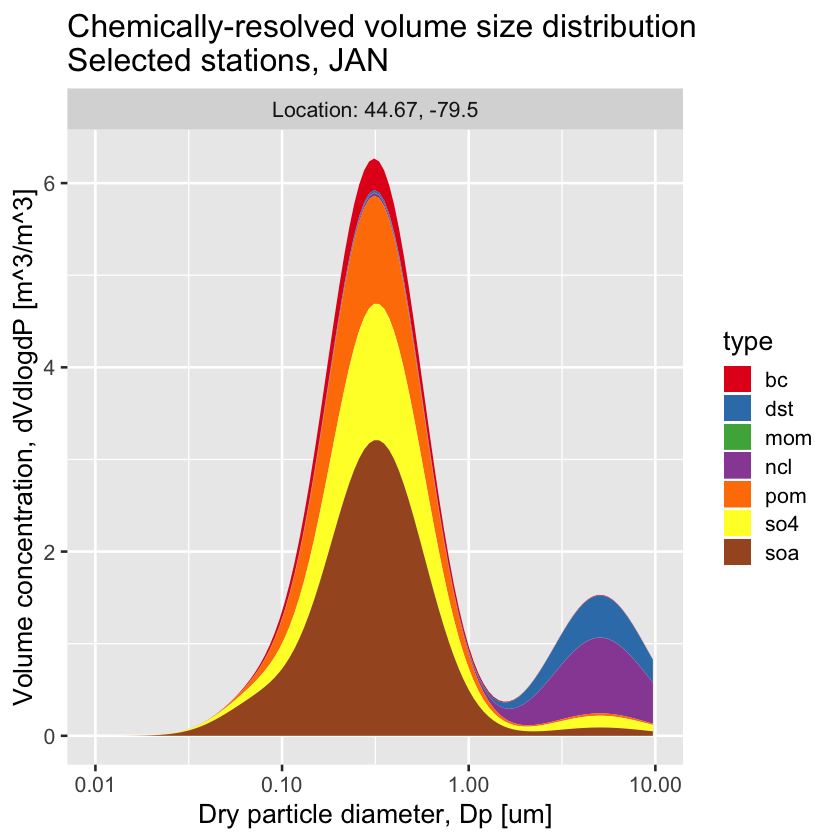

In [14]:
monthname <- c("JAN")

p <- ggplot(subset(station_chemistry_dp,
                   month %in% monthname),
            aes(x=Dp_um, y=vol, fill=type)) +
  theme(strip.text.y=element_text(angle=90)) +
  scale_x_log10(limits=c(0.01, 10)) + ylab("Volume concentration, dVdlogdP [m^3/m^3]") +
  xlab("Dry particle diameter, Dp [um]") +
  scale_fill_brewer(palette="Set1")
print(p + geom_area(position = 'stack') + facet_grid(.~station) +
  ggtitle(paste0("Chemically-resolved volume size distribution\nSelected stations, ",monthname)))
dev.off()

### Plot a second station (coordinate point)

In [15]:
##create new csv file (from python) for a different lat-lon
lat_new = '39.9'
lon_new = '116.4'
dirname = './data/'
filename = 'surface_chem_E3SM_v0_MOA.nc'
command = "python"

# Note the single + double quotes in the string (needed if paths have spaces)
path2script='"./utils/netcdf_to_csv.py"'

# Build up args in a vector
args = c(dirname,filename,lat_new,lon_new)

# Add path to script as first arg
allArgs = c(path2script, args)

system2(command, args=allArgs, stdout=TRUE)


character(0)

In [16]:
##load new csv file

commandArgs <- function(...) c(lat_new,lon_new,dirname)
source('./utils/aerosol_size_dist.R')
head(station_chemistry_dp)

Dp_um,vol,vol_frac,partial_kappa,num,num_frac,type,station,month
0.001031663,1.486457e-22,0.0001581569,1.581569e-05,2.743943e-13,0.0001678509,mom,"Location: 39.9, 116.4",JAN
0.001096995,4.698662e-22,0.0001573914,1.573914e-05,7.213736e-13,0.0001670243,mom,"Location: 39.9, 116.4",JAN
0.001166464,1.461913e-21,0.0001567508,1.567508e-05,1.866710e-12,0.0001663326,mom,"Location: 39.9, 116.4",JAN
0.001240332,4.476112e-21,0.0001562129,1.562129e-05,4.753679e-12,0.0001657519,mom,"Location: 39.9, 116.4",JAN
0.001318878,1.348452e-20,0.0001557599,1.557599e-05,1.191084e-11,0.0001652628,mom,"Location: 39.9, 116.4",JAN
0.001402398,3.996345e-20,0.0001553772,1.553772e-05,2.935965e-11,0.0001648496,mom,"Location: 39.9, 116.4",JAN


Warning message:
“Removed 259 rows containing missing values (position_stack).”

null device 
          1

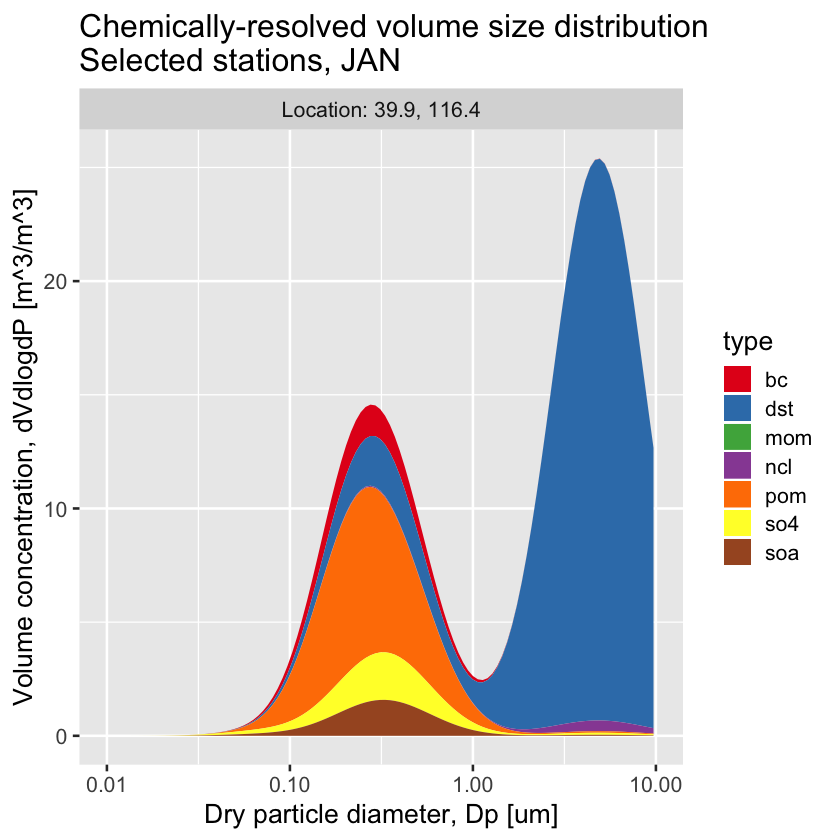

In [17]:
##create new distro plot
monthname <- c("JAN")

p <- ggplot(subset(station_chemistry_dp,
                   month %in% monthname),
            aes(x=Dp_um, y=vol, fill=type)) +
  theme(strip.text.y=element_text(angle=90)) +
  scale_x_log10(limits=c(0.01, 10)) + ylab("Volume concentration, dVdlogdP [m^3/m^3]") +
  xlab("Dry particle diameter, Dp [um]") +
  scale_fill_brewer(palette="Set1")
print(p + geom_area(position = 'stack') + facet_grid(.~station) +
  ggtitle(paste0("Chemically-resolved volume size distribution\nSelected stations, ",monthname)))
dev.off()